W: [2.6895783 2.6895783]
b: -4.26431
plot_y: [1.7854939  0.38549384]


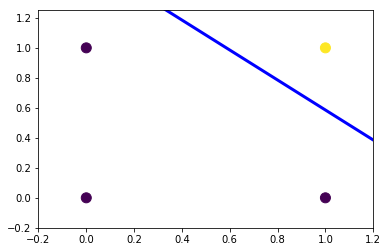

In [8]:
#based on https://github.com/nasirml/MachineLearningTensorFlow/blob/master/SingleLayerPerceptron/perceptronTensorFlow.py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

alpha = 0.01

x = np.array([[0, 0], [1, 0], [1, 1], [0, 1]], np.float32) # 4x2, input
y = np.array([0, 0, 1, 0], np.float32) # 4, correct output, AND operation
y = np.reshape(y, [4,1]) # convert to 4x1
 
X = tf.placeholder(tf.float32, shape=[4, 2])
Y = tf.placeholder(tf.float32, shape=[4, 1])
 
W = tf.Variable(tf.zeros([2, 1]), tf.float32)
B = tf.Variable(tf.zeros([1, 1]), tf.float32)
 
yHat = tf.sigmoid(tf.add(tf.matmul(X, W), B) ) # 4x1
err = Y - yHat
deltaW = tf.matmul(tf.transpose(X), err ) # have to be 2x1
deltaB = tf.reduce_sum(err, 0) # 4, have to 1x1. sum all the biases? yes
W_ = W + alpha * deltaW
B_ = B + alpha * deltaB
 
step = tf.group(W.assign(W_), B.assign(B_)) #to update the values of weights and biases.

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for k in range(2000):
        sess.run([step], feed_dict={X: x, Y: y})
    W = np.squeeze(sess.run(W))
    b = np.squeeze(sess.run(B))
 
# Now plot the fitted line. We need only two points to plot the line
plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
plot_y = - 1 / W[1] * (W[0] * plot_x + b)
plot_y = np.reshape(plot_y, [2, -1])
plot_y = np.squeeze(plot_y)
 
print('W: ' + str(W))
print('b: ' + str(b))
print('plot_y: '+ str(plot_y))
 
plt.scatter(x[:, 0], x[:, 1], c=y[:,0], s=100)
plt.plot(plot_x, plot_y, color='b', linewidth=3)
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()